In [14]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

KENYA_NIGERIA = pd.read_excel('data/Kenya-Nigeria.xlsx')

In [27]:
KENYA_NIGERIA

,Year,Kenya GDP Growth,Kenya Trade Volume,Nigeria GDP Growth,Nigeria Trade Volume,Combined GDP Growth,Combined Trade Volume,Inflation Rate,Employment Rate,Export Volume
0,2003,4.70,15.00,7.20,30.00,11.90,45.00,1.81,97.27,8.53
1,2004,5.10,15.50,6.90,30.50,12.00,46.00,1.84,94.31,9.58
2,2005,5.40,16.00,6.60,31.00,12.00,47.00,1.47,92.02,9.97
3,2006,6.00,16.50,6.30,31.50,12.30,48.00,2.75,94.07,6.37
4,2007,7.00,17.00,6.00,32.00,13.00,49.00,1.69,97.35,7.13
5,2008,1.50,17.50,5.90,32.50,7.40,50.00,2.99,95.27,7.93
6,2009,2.70,18.00,6.30,33.00,9.00,51.00,2.76,97.38,6.46
7,2010,4.60,18.50,7.00,33.50,11.60,52.00,1.32,97.29,5.97
8,2011,5.30,19.00,8.00,34.00,13.30,53.00,1.65,99.83,5.02
9,2012,4.80,19.50,7.70,34.50,12.50,54.00,1.05,93.43,9.36


Asociacion entre variables cuantitativas

enfoque grafico

graficos de dispersión

Text(0, 0.5, 'Combined GDP Growth')

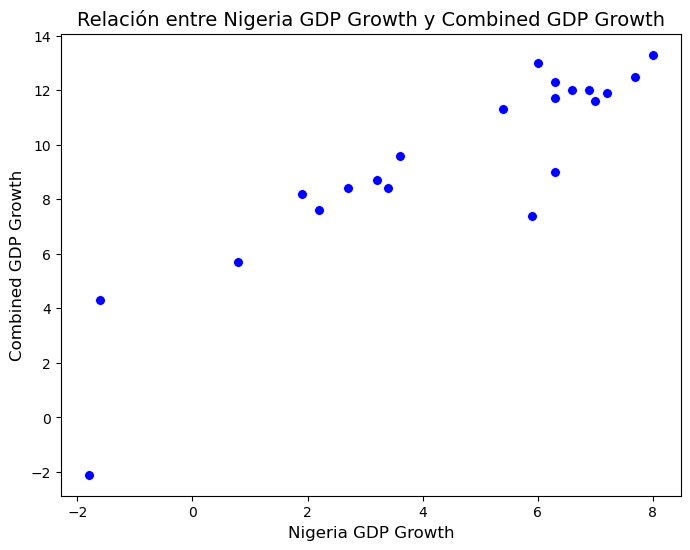

In [33]:
# Usamos tus variables seleccionadas
x_var = 'Nigeria GDP Growth'
y_var = 'Combined GDP Growth'

# Paso 1: Gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x=KENYA_NIGERIA[x_var], y=KENYA_NIGERIA[y_var], s=50, color='blue')

# Etiquetas y título del gráfico
plt.title(f'Relación entre {x_var} y {y_var}', fontsize=14)
plt.xlabel(x_var, fontsize=12)
plt.ylabel(y_var, fontsize=12)

Enfoque numerico.

Covarianza
Mide asociación de tipo lineal
Puede tomar cualquier valor
Depende de las unidades de medida de las variables

Es un promedio donde cada individuo aporta el producto de la distancia de su variable X respecto a la media * su variable y respecto a la media. Si estas co-variaciones tienen siempre la misma orientación, hablamos de una asociación de tipo lineal.
Si priman las covariaciones positivas, tenemos relación directa
Si priman la covariaciones negativas tenemos relación inversa
Y si nos encontramos en torno al 0 no hay relacion

(dibujo 1)

Limitaciones de la covarianza…
1.	La covarianza pude tomar cualquier valor entre -inf y +inf
covarianza de 5 puede ser mas que de 1200
2.	La covarianza depende del nivel de medición de las variables
la covarianza entre altura en Cm y peso en Kg es distinta que la covarianza entre pies y libras cuando todas las mediciones se hacen sobre los mismo individuos



Indice de correlación lineal de Pearson.

Es la covarianza dividia por el producto de los desvíos estándar de las dos variables.
-1<= r <= 1
- es independiente de las unidades de medida de las variables

Como divide por un termino que es positivo, el signo del r viene dado por le signo de la covarianza  
r+ asociación lineal directa  
r- asociación lineal invers  a
r=0 perfecta independencia  

(dibujo 2)

El coeficiente de correlación de Pearson solo nos sirve para indicar asociaciones de tipo lineal entre variables cuantitativas y esa es su  única utilidad. Un par de variables pueden tener un coeficiente de Pearson 0 y sin embargo tener otro tipo de asociación no lineal

In [34]:
# Paso 2: Calcular la correlación de Pearson
correlacion_pearson = KENYA_NIGERIA[x_var].corr(KENYA_NIGERIA[y_var])
print(f'Correlación de Pearson entre {x_var} y {y_var}: {correlacion_pearson:.2f}')

Correlación de Pearson entre Nigeria GDP Growth y Combined GDP Growth: 0.89


Regresion lineal
Buscamos predecir la variable dependiente a través de la variable independiente o predictora

El error se supone aleatorio y de media 0 para todo i
ALFA y BETA son parámetros poblacionales desconcidos. Y uno propone estimadores/

Puedo calcular el predictor de Y para cada individuo

La diferencia entre el valor observado y el valor predicho se denomina RESIDUO
Estimacion por minimos cuadrados> se busca la recata donde los los erroes son los minimos posibles. Siempre es calculable a través de este método

Se deben plastear test de hipótesis para testear al significacia de  los estimadoresmde beta y alfa y descartar que no sean nulos

Para la evaluación de los estimadores si necesitamos supuestos
Que los errores siguen una distirbucion normal y con desvio sigma cuadrado y que esos errores son independientes entre si. Si se cumplen
Podemos definir un estadístico de pueba T  que tiene distribución T de student
Por que es importante todo esto? Porque si el estimador de BETA es 0, no podemos predecir.
Ocurre algo idéntico en alfa, para saber si al ordenanada al origen no es 0. También podemos calcular une stadistico con distribución t de student
Analisis de la varianza en regresión lineal= 
Test F 

Función OLS= 
Estimador de alfa=> const
Estimador de beta =>v dependiente 
El estaditico t es = estimado/error estándar

In [35]:
# Paso 3: Ajustar el modelo de regresión lineal
X_simple = sm.add_constant(KENYA_NIGERIA[x_var])
y_simple = KENYA_NIGERIA[y_var]

modelo_simple = sm.OLS(y_simple, X_simple).fit()

# Mostrar el resumen del modelo
print(modelo_simple.summary())



                             OLS Regression Results                            
Dep. Variable:     Combined GDP Growth   R-squared:                       0.793
Model:                             OLS   Adj. R-squared:                  0.782
Method:                  Least Squares   F-statistic:                     72.84
Date:                 Sun, 22 Sep 2024   Prob (F-statistic):           6.33e-08
Time:                         20:54:21   Log-Likelihood:                -39.795
No. Observations:                   21   AIC:                             83.59
Df Residuals:                       19   BIC:                             85.68
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.4

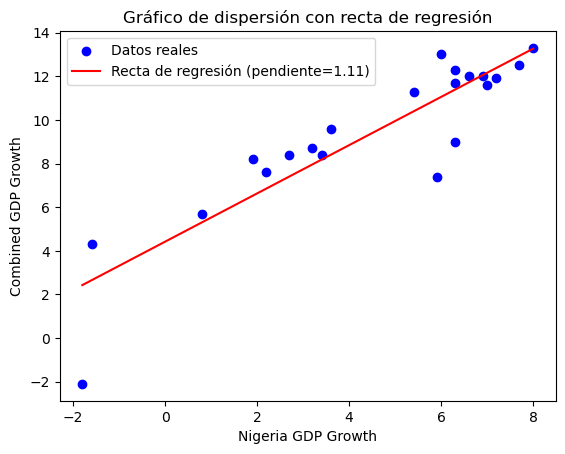

In [37]:
# Paso 4: Generar la recta de regresión
# Gráfico de dispersión
plt.scatter(KENYA_NIGERIA[x_var], KENYA_NIGERIA[y_var], label='Datos reales', color='blue')

# Generar la recta de regresión
intercepto, pendiente = modelo_simple.params
x_vals = np.linspace(KENYA_NIGERIA[x_var].min(), KENYA_NIGERIA[x_var].max(), 100)
y_vals = intercepto + pendiente * x_vals

#  Dibujar la recta de regresión en el gráfico de dispersión
plt.plot(x_vals, y_vals, color='red', label=f'Recta de regresión (pendiente={pendiente:.2f})')

# Paso 4: Personalizar el gráfico
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title('Regresion lineal de Crecimiento de Nigeria contra Crecimiento combinado ')
plt.legend()

# Mostrar el gráfico final
plt.show()

Hasta aca solo nos dice si beta predice, no si la predicción es buena o mala

La calidad de laprediccion se da por el R cuadrado y R cuadrado ajustado

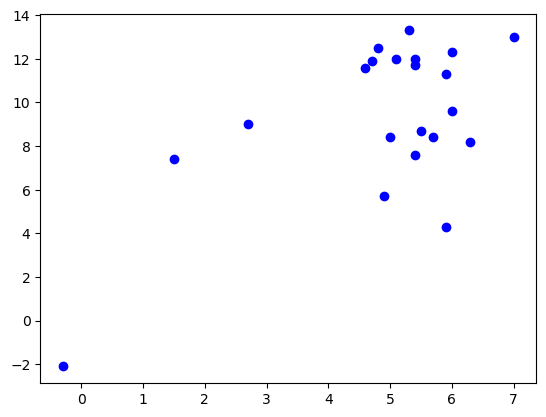

In [38]:
x_secundaria = 'Kenya GDP Growth'
y_var = 'Combined GDP Growth'

# Paso 1: Gráfico de dispersión
plt.scatter(KENYA_NIGERIA[x_secundaria], KENYA_NIGERIA[y_var], label='Datos reales', color='blue')



In [39]:
# Paso 2: Calcular la correlación de Pearson
correlacion_pearson = KENYA_NIGERIA[x_secundaria].corr(KENYA_NIGERIA[y_var])
print(f'Correlación de Pearson entre {x_secundaria} y {y_var}: {correlacion_pearson:.2f}')

Correlación de Pearson entre Kenya GDP Growth y Combined GDP Growth: 0.61


In [40]:
# Paso 2: Ajustar el modelo de regresión lineal
X_simple_secundaria = sm.add_constant(KENYA_NIGERIA[x_secundaria])  # Añadir la constante
modelo_simple_secundaria = sm.OLS(KENYA_NIGERIA[y_var], X_simple_secundaria).fit()

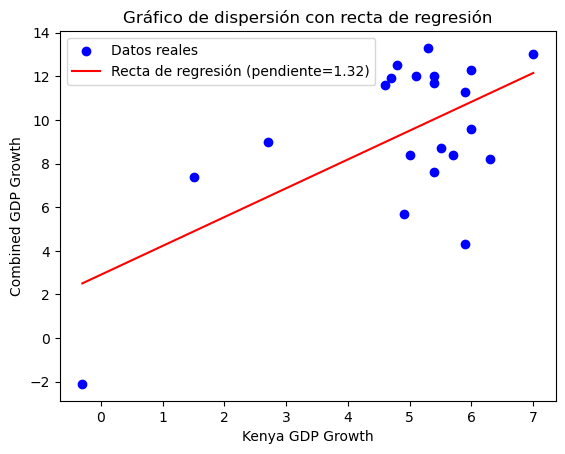

In [42]:
# Paso 3: Generar la recta de regresión
plt.scatter(KENYA_NIGERIA[x_secundaria], KENYA_NIGERIA[y_var], label='Datos reales', color='blue')


intercepto, pendiente = modelo_simple_secundaria.params
x_vals = np.linspace(KENYA_NIGERIA[x_secundaria].min(), KENYA_NIGERIA[x_secundaria].max(), 100)
y_vals = intercepto + pendiente * x_vals

# Paso 4: Dibujar la recta de regresión en el gráfico de dispersión
plt.plot(x_vals, y_vals, color='red', label=f'Recta de regresión (pendiente={pendiente:.2f})')

# Paso 5: Personalizar el gráfico
plt.xlabel(x_secundaria)
plt.ylabel(y_var)
plt.title('Gráfico de dispersión con recta de regresión')
plt.legend()

# Mostrar el gráfico final
plt.show()


In [43]:
# Paso 6: Mostrar el resumen del modelo
print(modelo_simple_secundaria.summary())

                             OLS Regression Results                            
Dep. Variable:     Combined GDP Growth   R-squared:                       0.374
Model:                             OLS   Adj. R-squared:                  0.341
Method:                  Least Squares   F-statistic:                     11.34
Date:                 Sun, 22 Sep 2024   Prob (F-statistic):            0.00324
Time:                         21:10:46   Log-Likelihood:                -51.425
No. Observations:                   21   AIC:                             106.8
Df Residuals:                       19   BIC:                             108.9
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.9052   

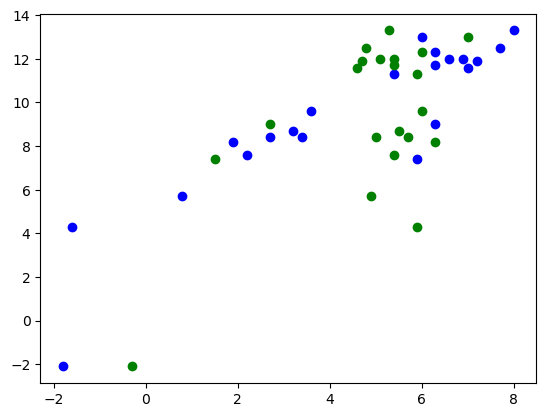

In [45]:
# Bonus track
plt.scatter(KENYA_NIGERIA[x_var], KENYA_NIGERIA[y_var], label='Nigeria GDP Growth', color='blue')
plt.scatter(KENYA_NIGERIA[x_secundaria], KENYA_NIGERIA[y_var], label='Kenya GDP Growth', color='green')
# Etiquetas y título del gráfico
plt.title(f'Relación entre {x_var} y {y_var}', fontsize=14)
plt.xlabel(x_var, fontsize=12)
plt.ylabel(y_var, fontsize=12)

el modelo de regresion propuesto solo sirve para estimar dentro del rango de valores propuestos en la muestra